Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer   #TfidfVectorizer converts text data to numric data


Data Collection and Preprocessing

In [2]:
#loading the data fron csv file to pandas Dataframe
raw_mail_data = pd.read_csv('/content/spam.csv' , encoding='latin-1')

In [3]:
raw_mail_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
raw_mail_data.dropna(how="any", inplace=True, axis=1)
raw_mail_data.columns = ['label', 'message']

In [5]:
raw_mail_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
raw_mail_data.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
# chwcking the number of rows and columns in the dataframe
raw_mail_data.shape

(5572, 2)

<ipython-input-8-765ea3fcdba2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'label', data = raw_mail_data, palette=['blue'])
<ipython-input-8-765ea3fcdba2>:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = 'label', data = raw_mail_data, palette=['blue'])


Text(0.5, 1.0, 'Spam vs Ham')

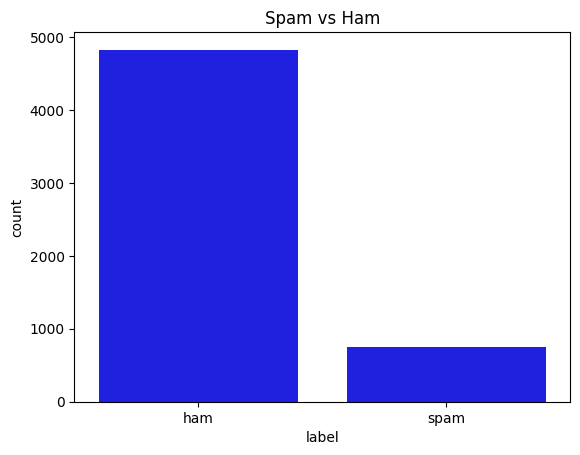

In [8]:
sns.countplot(x = 'label', data = raw_mail_data, palette=['blue'])
plt.title('Spam vs Ham')

Label encoding

In [9]:
# label spam mail as 0, ham mail as 1
raw_mail_data.loc[raw_mail_data['label'] == 'spam' , 'label',] = 0
raw_mail_data.loc[raw_mail_data['label'] == 'ham' , 'label',] = 1



spam  - 0
ham - 1

In [10]:
# separating the data and labels
X = raw_mail_data['message']
y = raw_mail_data['label']

In [11]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [12]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: object

Splitting the data into training data and test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 3)


In [14]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [15]:
# transform the text data to feature vectors that can be used as input to the model
feature_extraction = TfidfVectorizer(min_df = 1, stop_words= 'english')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


# convert y_train and y_test values as integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')



In [16]:
X_train

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: message, Length: 4457, dtype: object

In [17]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

**Training the model**

**Logistic Regression**

In [18]:
lr = LogisticRegression()

In [19]:
# training the Logistic Regression model with the training data
lr.fit(X_train_features, y_train)

LogisticRegression()

**Evaluating the trained model**

In [20]:
 # prediction on training data
prediction_on_training_data = lr.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)


In [21]:
print('Accuarcy on training data: ', accuracy_on_training_data)

Accuarcy on training data:  0.9661207089970832


In [22]:
 # prediction on test data
prediction_on_test_data = lr.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)


In [23]:
print('Accuarcy on test data: ', accuracy_on_test_data)

Accuarcy on test data:  0.9623318385650225


***Support vector machine***

In [24]:
svm = SVC()

In [25]:
# training the Support vector model with the training data
svm.fit(X_train_features, y_train)

SVC()

**Evaluating the Trained Model**

In [26]:
# prediction on training data
prediction_on_training_data = svm.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [27]:
print('Accuarcy on training data: ', accuracy_on_training_data)

Accuarcy on training data:  0.9982050706753421


In [28]:
 # prediction on test data
prediction_on_test_data = svm.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [29]:
print('Accuarcy on test data: ', accuracy_on_test_data)

Accuarcy on test data:  0.9829596412556054


**Building a predictive system**

In [30]:
input_mail = ['"URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18",,,']

#convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = lr.predict(input_data_features)
print(prediction)

if prediction[0] ==1:
  print("Ham mail")
else:
  print('spam mail')


[0]
spam mail
